Name:Deepak K<br>
Email:deepakjeff2@gmail.com

#### https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/data

Download dataset from above link, you will perform clustering on customers. 


# Clustering Assignment (End-to-End)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from tqdm import tqdm
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [2]:
#importing dataset
data = pd.read_csv('marketing_campaign.csv',sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
data.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [4]:
#Data understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.shape

(2240, 29)

In [6]:
#Data Cleaning if required
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
print(data.shape)
data.dropna(inplace=True)
print(data.shape)

(2240, 29)
(2216, 29)


In [8]:
#derived matric
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

In [9]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
    
data['Customer_For'] = days
data['Customer_For'] = pd.to_numeric(data['Customer_For'], errors='coerce')

In [10]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [11]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [13]:
a#Creating list of numerical and categorical columns
num_cols = [i for i in data.columns if data[i].dtype != 'object']
cat_cols = [i for i in data.columns if data[i].dtype == 'object']
print(num_cols)
print(cat_cols)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent']
['Education', 'Living_With']


# EDA 

Column Name: Income


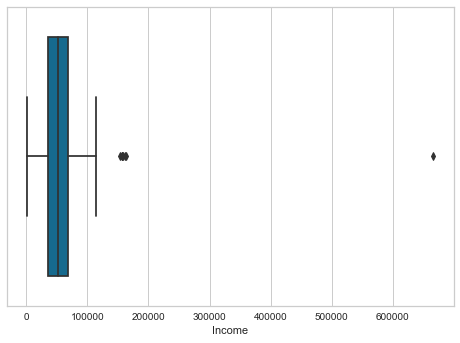

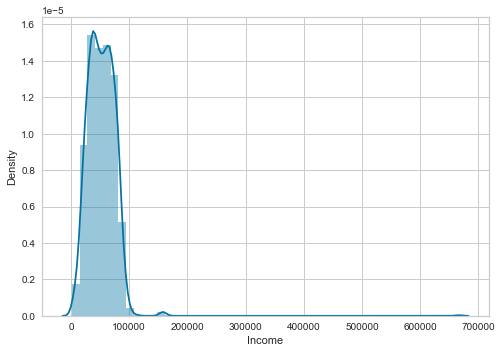

Column Name: Kidhome


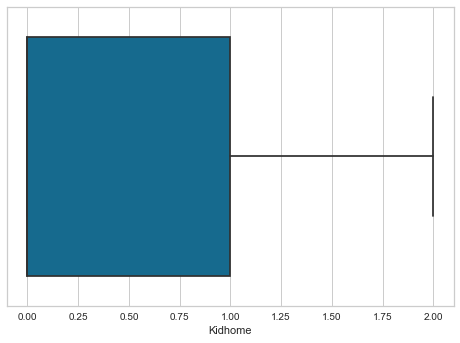

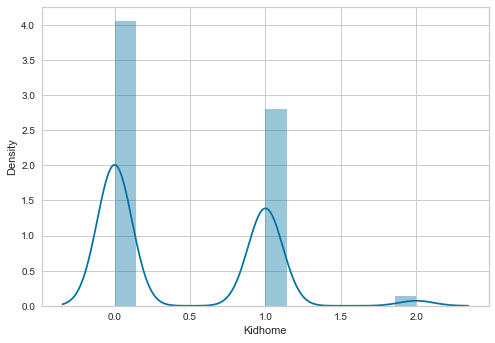

Column Name: Teenhome


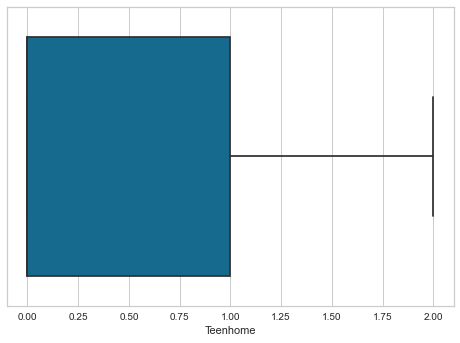

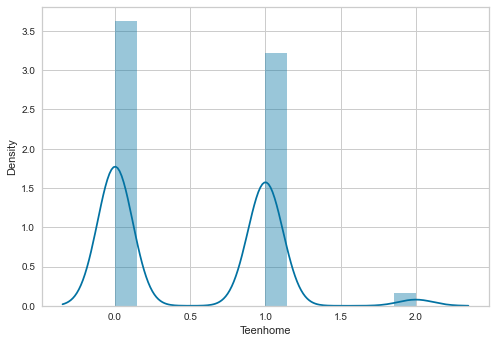

Column Name: Recency


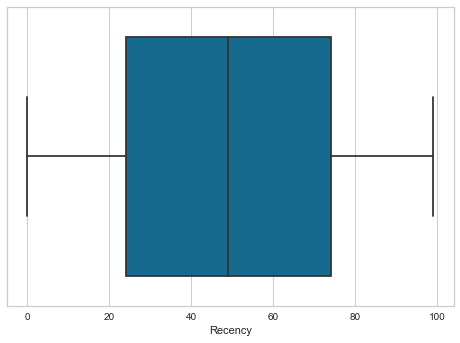

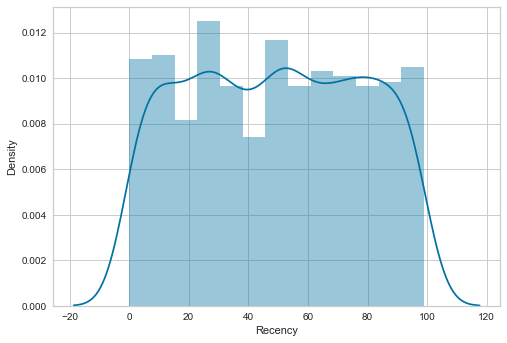

Column Name: Wines


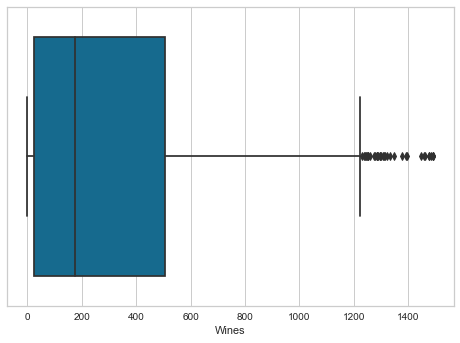

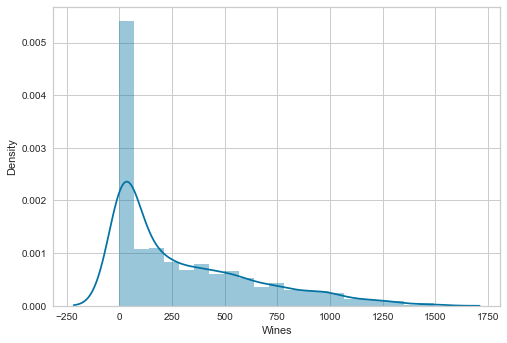

Column Name: Fruits


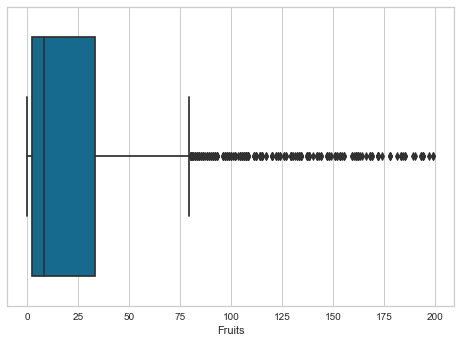

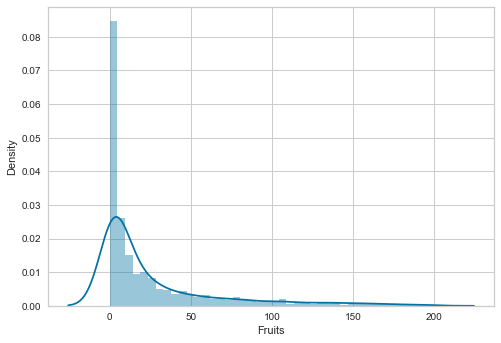

Column Name: Meat


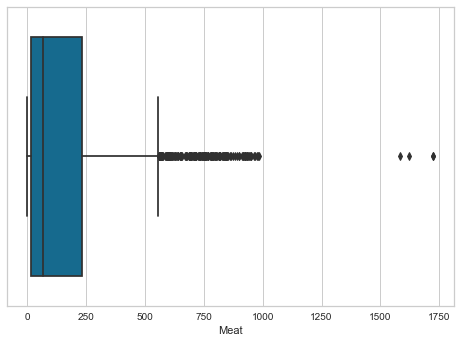

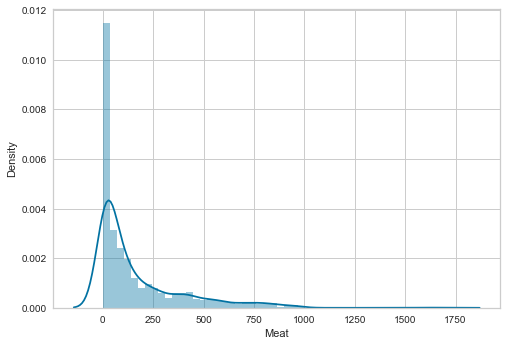

Column Name: Fish


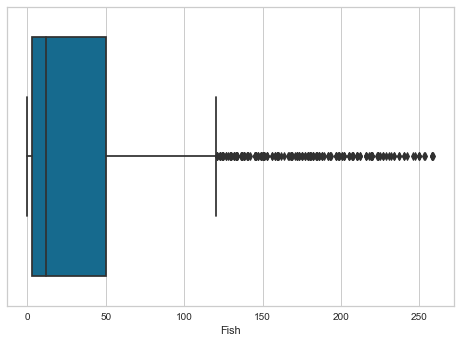

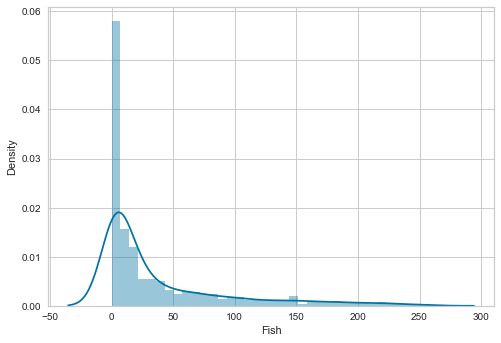

Column Name: Sweets


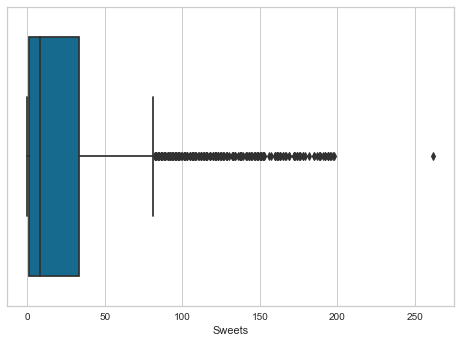

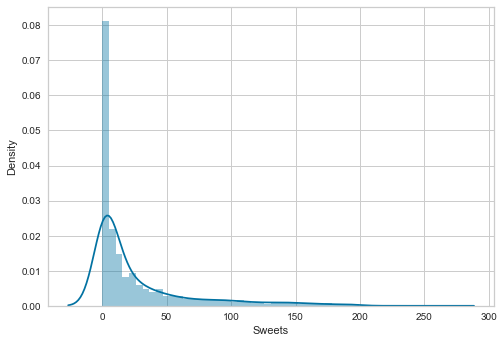

Column Name: Gold


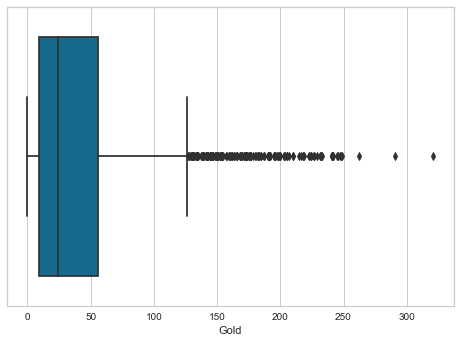

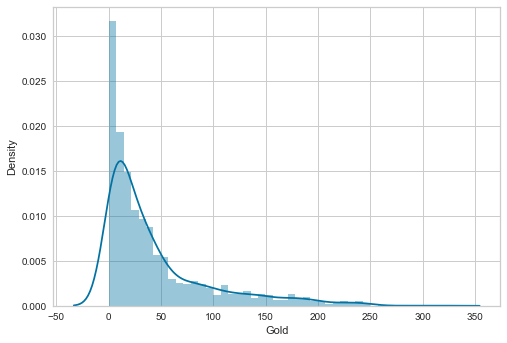

Column Name: NumDealsPurchases


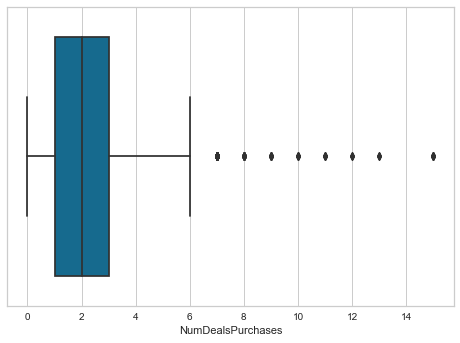

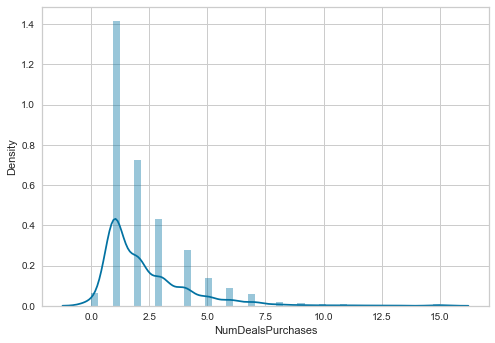

Column Name: NumWebPurchases


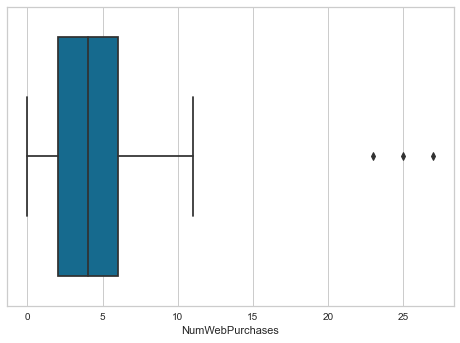

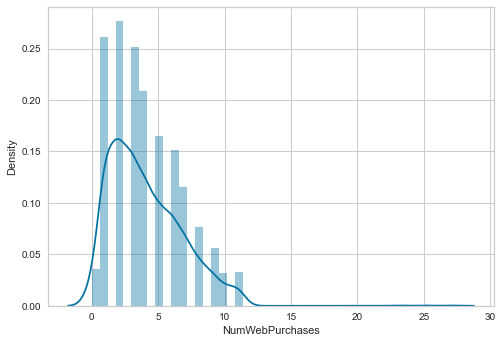

Column Name: NumCatalogPurchases


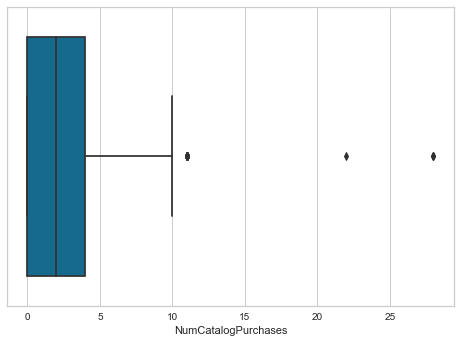

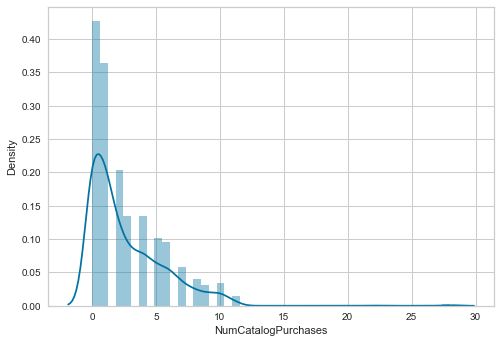

Column Name: NumStorePurchases


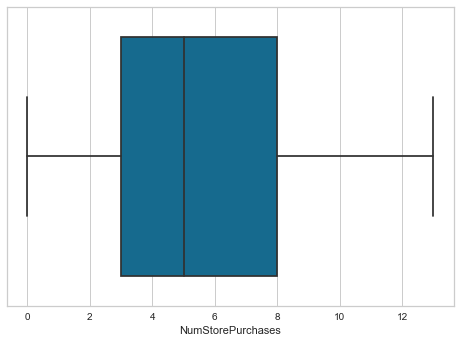

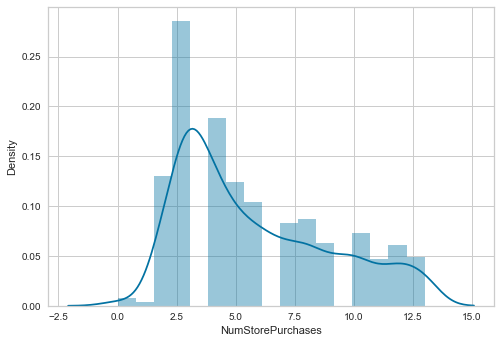

Column Name: NumWebVisitsMonth


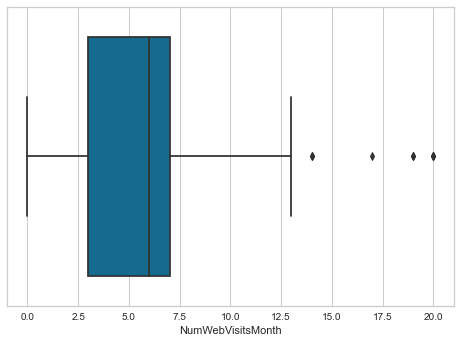

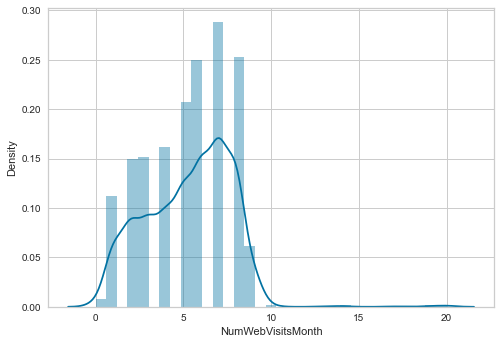

Column Name: AcceptedCmp3


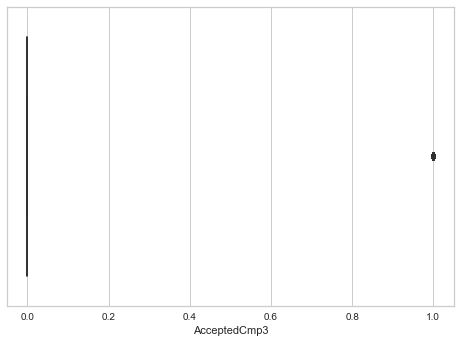

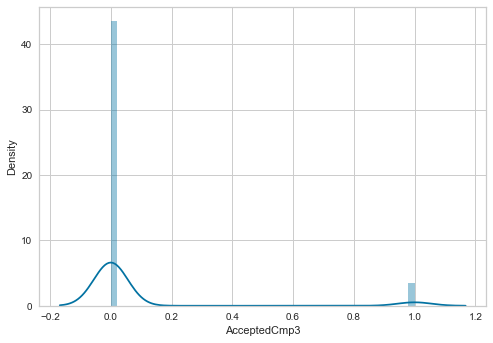

Column Name: AcceptedCmp4


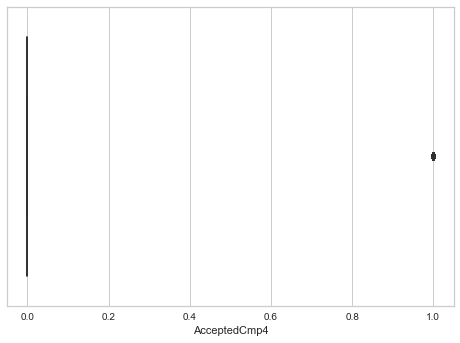

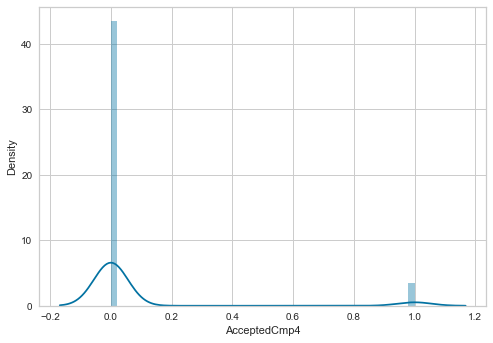

Column Name: AcceptedCmp5


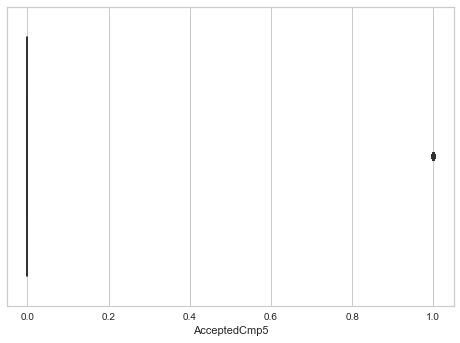

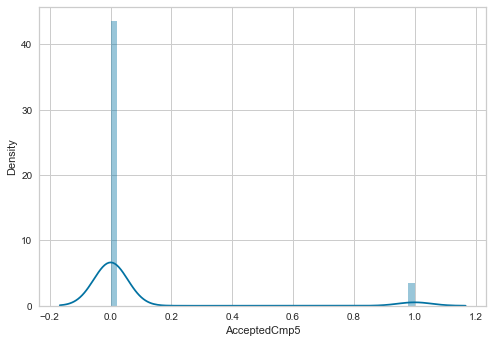

Column Name: AcceptedCmp1


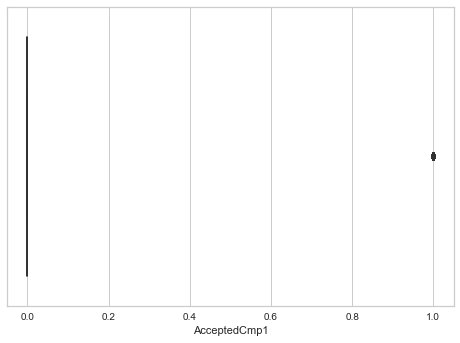

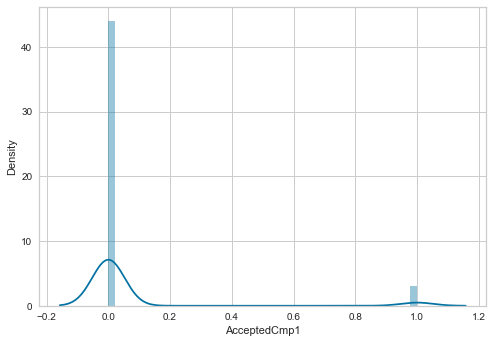

Column Name: AcceptedCmp2


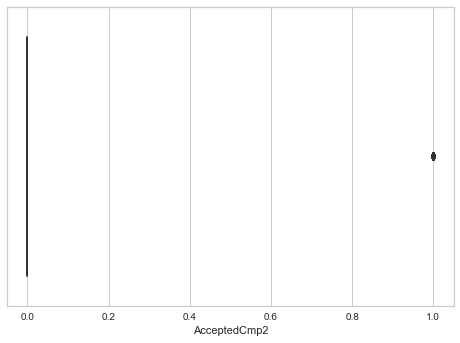

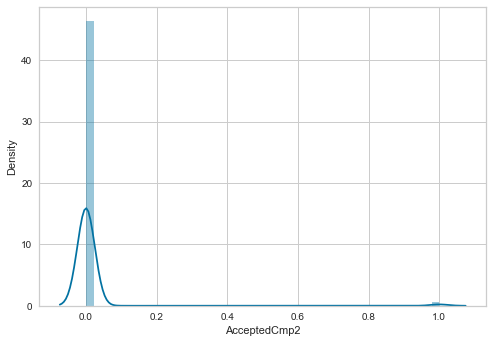

Column Name: Complain


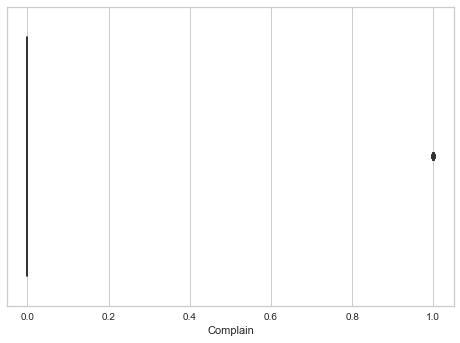

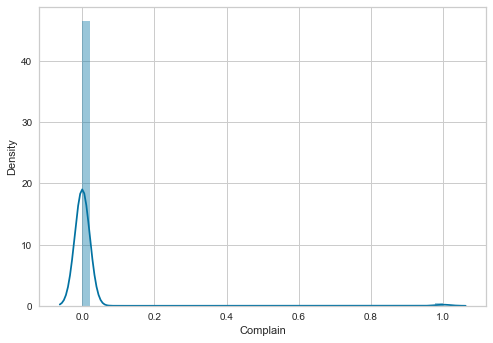

Column Name: Response


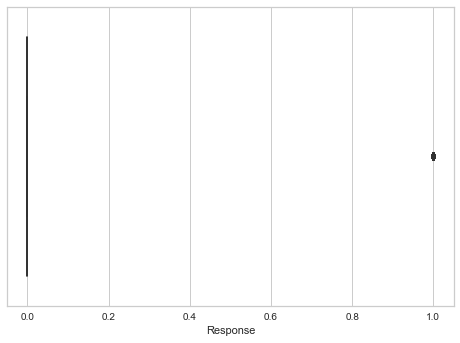

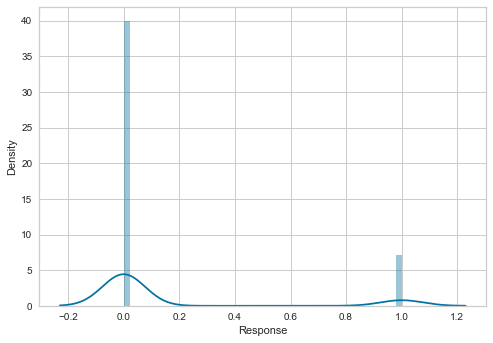

Column Name: Customer_For


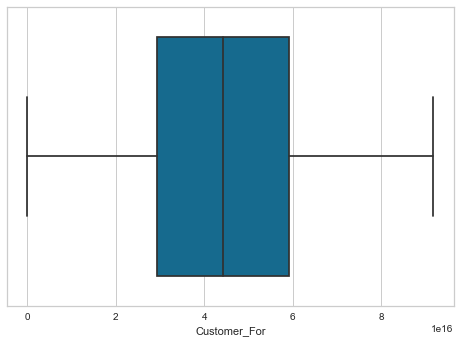

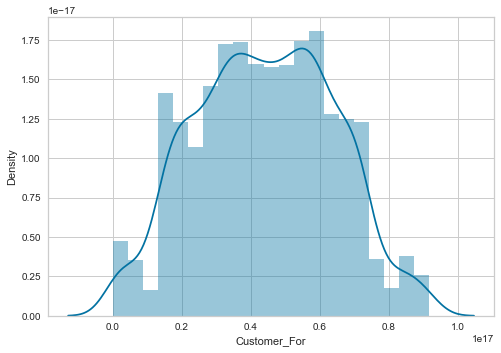

Column Name: Age


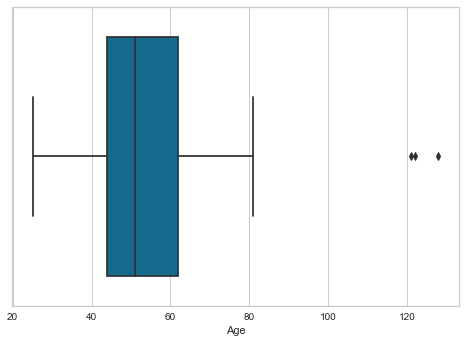

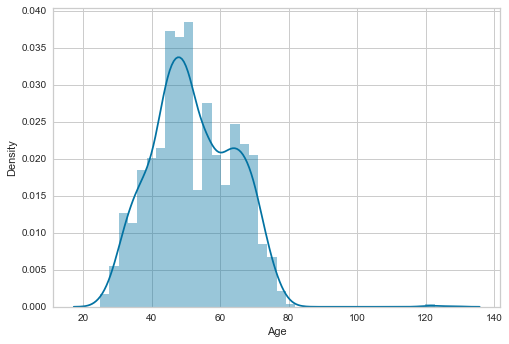

Column Name: Spent


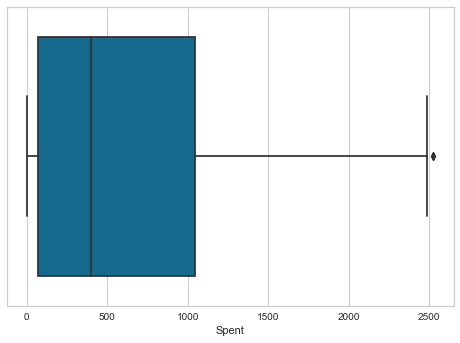

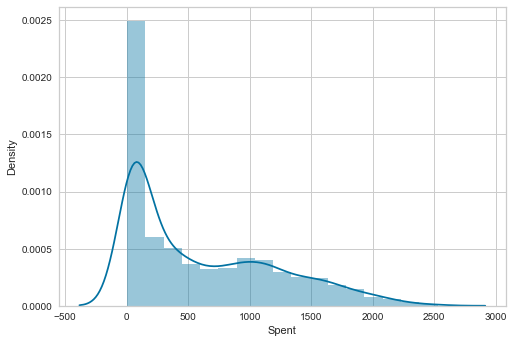

Column Name: Children


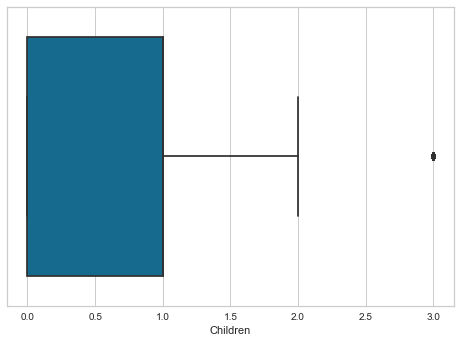

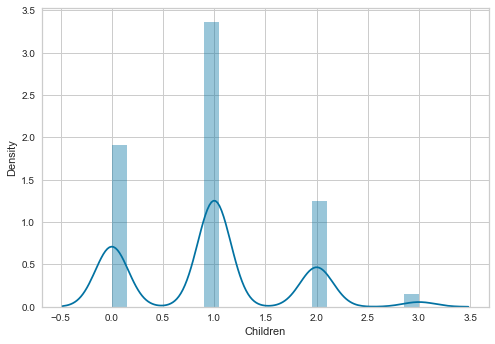

Column Name: Family_Size


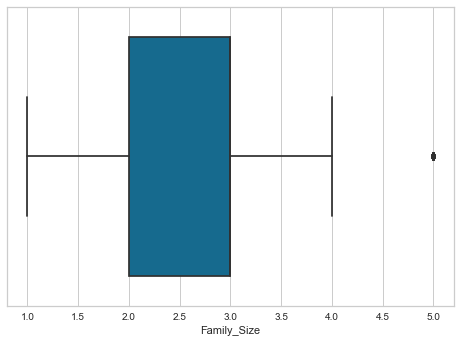

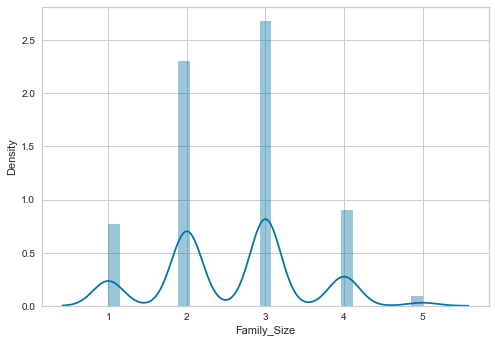

Column Name: Is_Parent


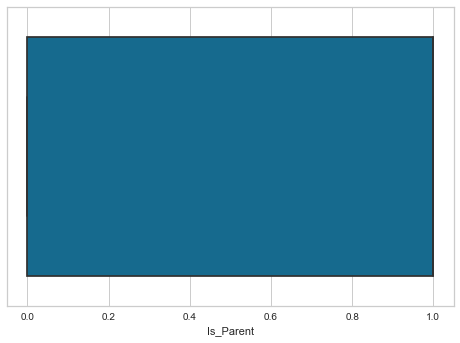

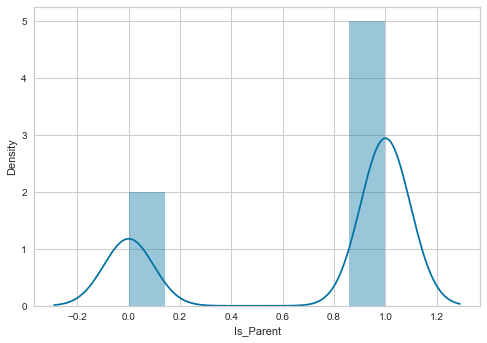

In [14]:
#univarite
for i in num_cols:
    print('Column Name:',i)
    sns.boxplot(data[i])
    plt.show()
    sns.distplot(data[i])
    plt.show()

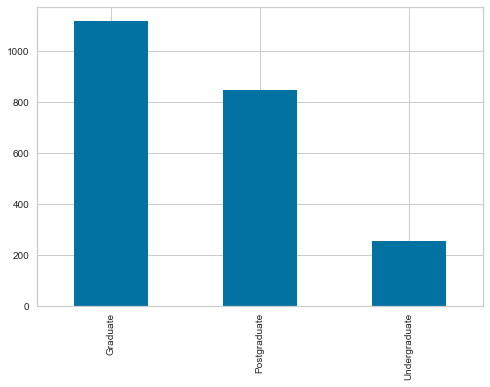

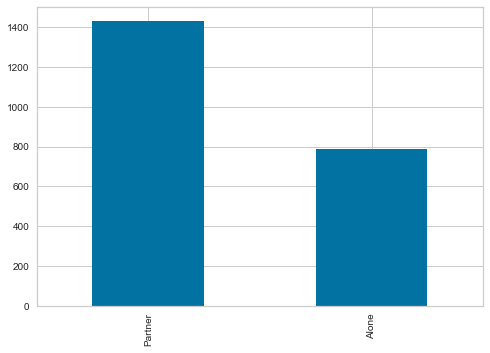

In [15]:
for i in cat_cols:
    data[i].value_counts().plot.bar()
    plt.show()

In [16]:
#dropping outliers in Age and Income columns
data = data[(data['Age']<90)]
data = data[(data['Income']<600000)]
data.shape

(2212, 30)

In [17]:
#bivariate
print(pd.crosstab(data['Education'],data['Living_With'],margins=True,values=data['Education'],aggfunc=pd.Series.count))

Living_With    Alone  Partner   All
Education                          
Graduate         402      713  1115
Postgraduate     300      545   845
Undergraduate     82      170   252
All              784     1428  2212


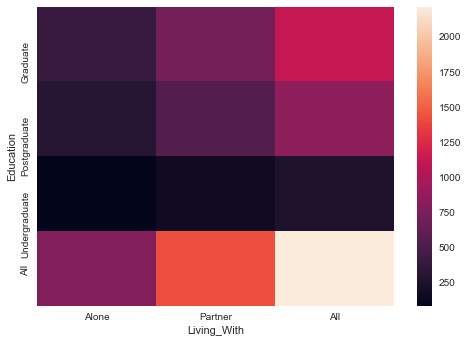

In [18]:
sns.heatmap(pd.crosstab(data['Education'],data['Living_With'],margins=True,values=data['Education'],aggfunc=pd.Series.count))
plt.show()

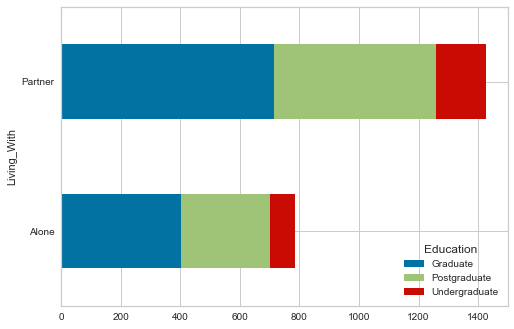

In [19]:
data.pivot_table(index='Living_With', columns='Education', aggfunc='size').plot.barh(stacked=True)
plt.show()

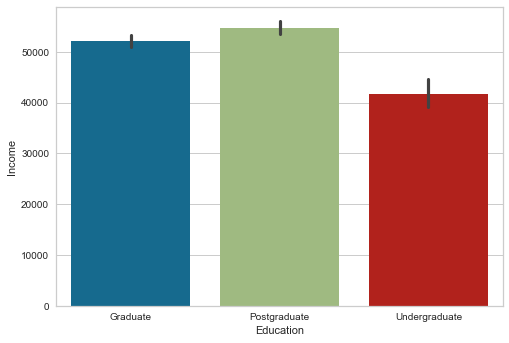

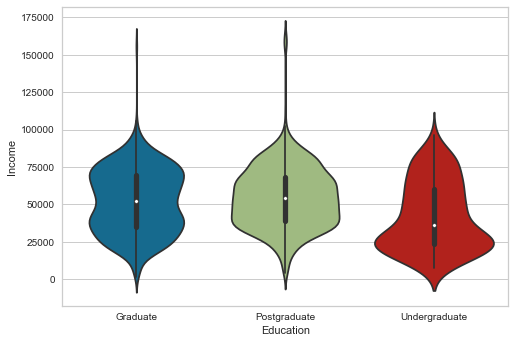

In [20]:
sns.barplot(x = 'Education',y = 'Income',data=data )
plt.show()
sns.violinplot(data=data,x = 'Education',y = 'Income')
plt.show()

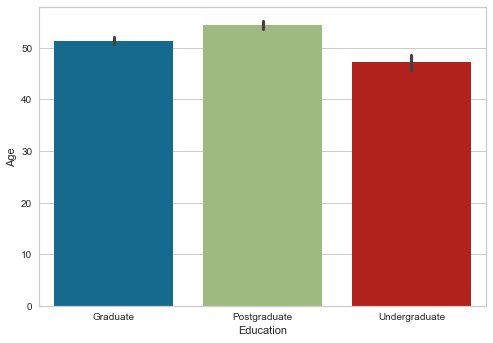

In [21]:
sns.barplot(x = 'Education',y = 'Age',data=data )
plt.show()

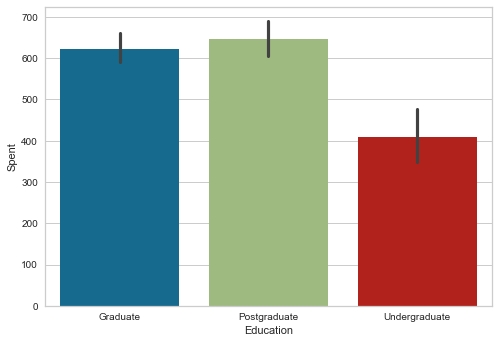

In [22]:
sns.barplot(x = 'Education',y = 'Spent',data=data )
plt.show()

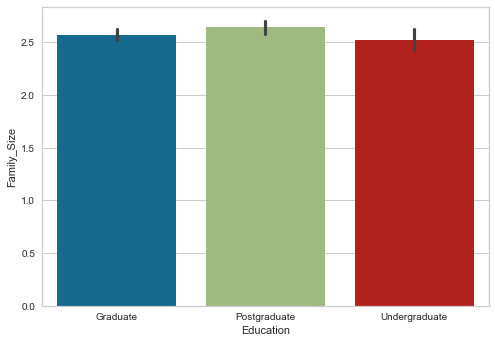

In [23]:
sns.barplot(x = 'Education',y = 'Family_Size',data=data )
plt.show()

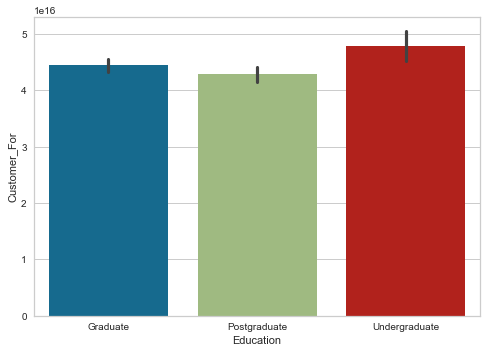

In [24]:
sns.barplot(x = 'Education',y = 'Customer_For',data=data )
plt.show()

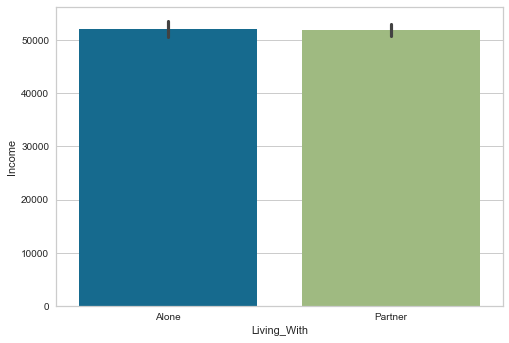

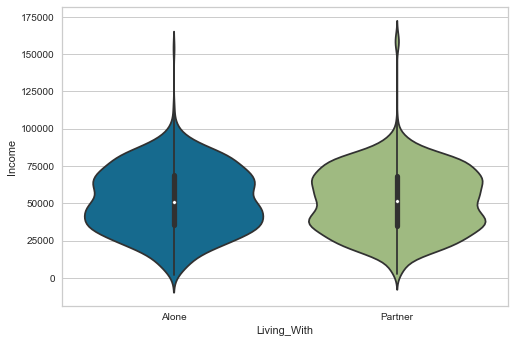

In [25]:
sns.barplot(x = 'Living_With',y = 'Income',data=data )
plt.show()
sns.violinplot(data=data,x = 'Living_With',y = 'Income')
plt.show()

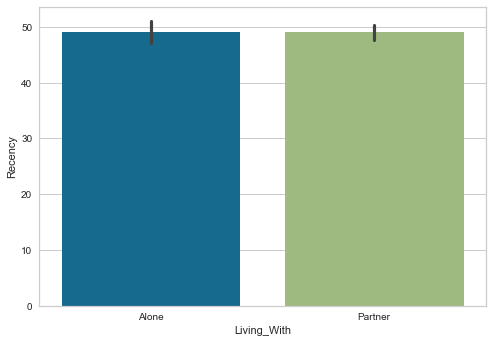

In [26]:
sns.barplot(x = 'Living_With',y = 'Recency',data=data )
plt.show()

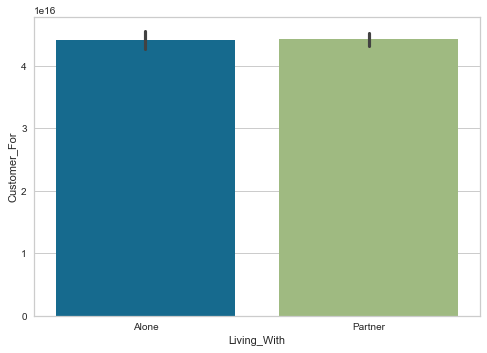

In [27]:
sns.barplot(x = 'Living_With',y = 'Customer_For',data=data )
plt.show()

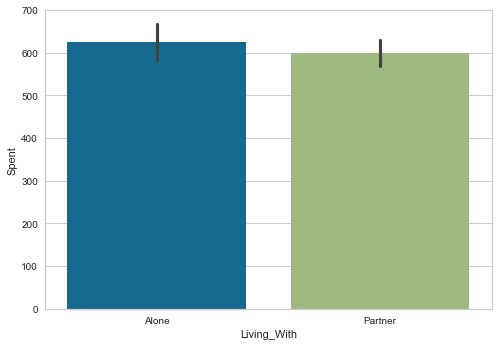

In [28]:
sns.barplot(x = 'Living_With',y = 'Spent',data=data )
plt.show()

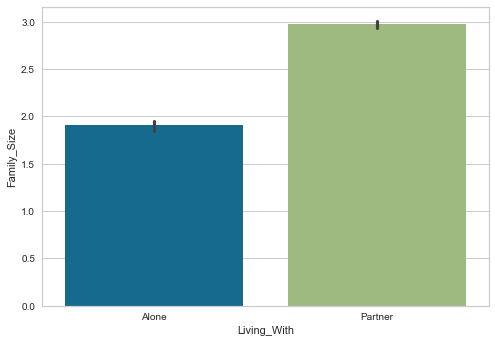

In [29]:
sns.barplot(x = 'Living_With',y = 'Family_Size',data=data )
plt.show()

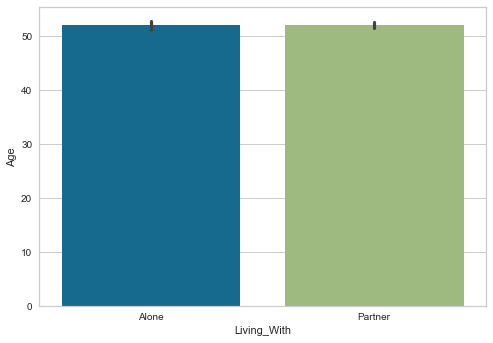

In [30]:
sns.barplot(x = 'Living_With',y = 'Age',data=data )
plt.show()

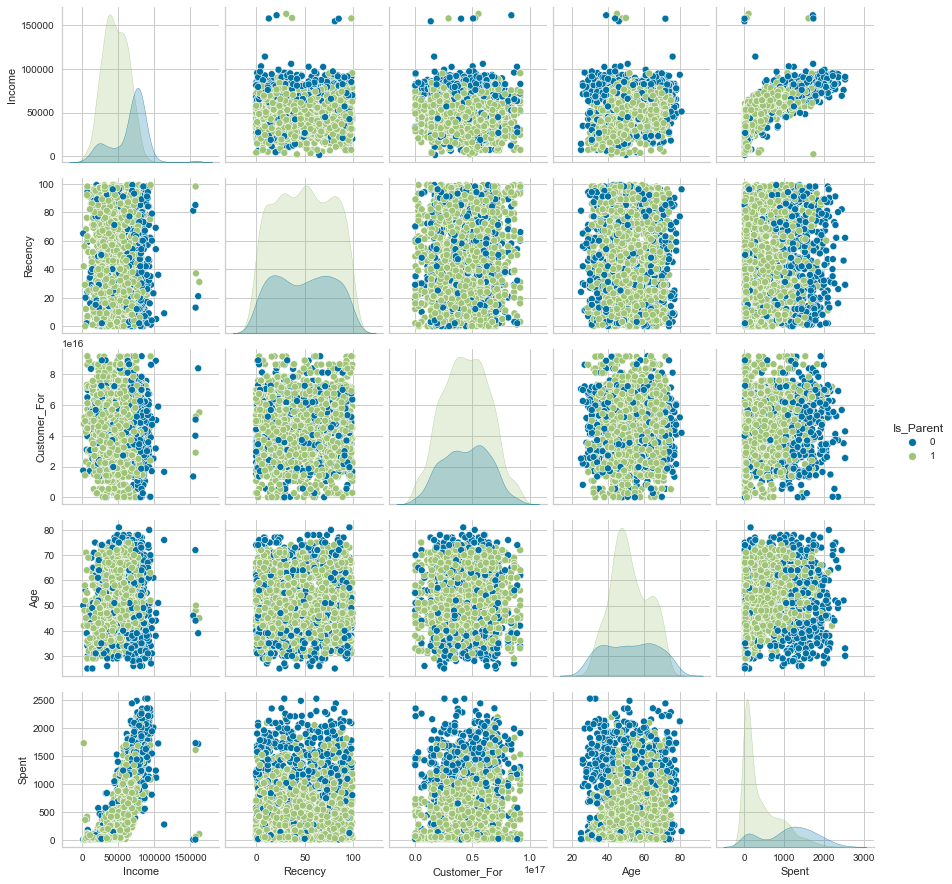

In [31]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
sns.pairplot(data[To_Plot], hue= "Is_Parent")
plt.show()

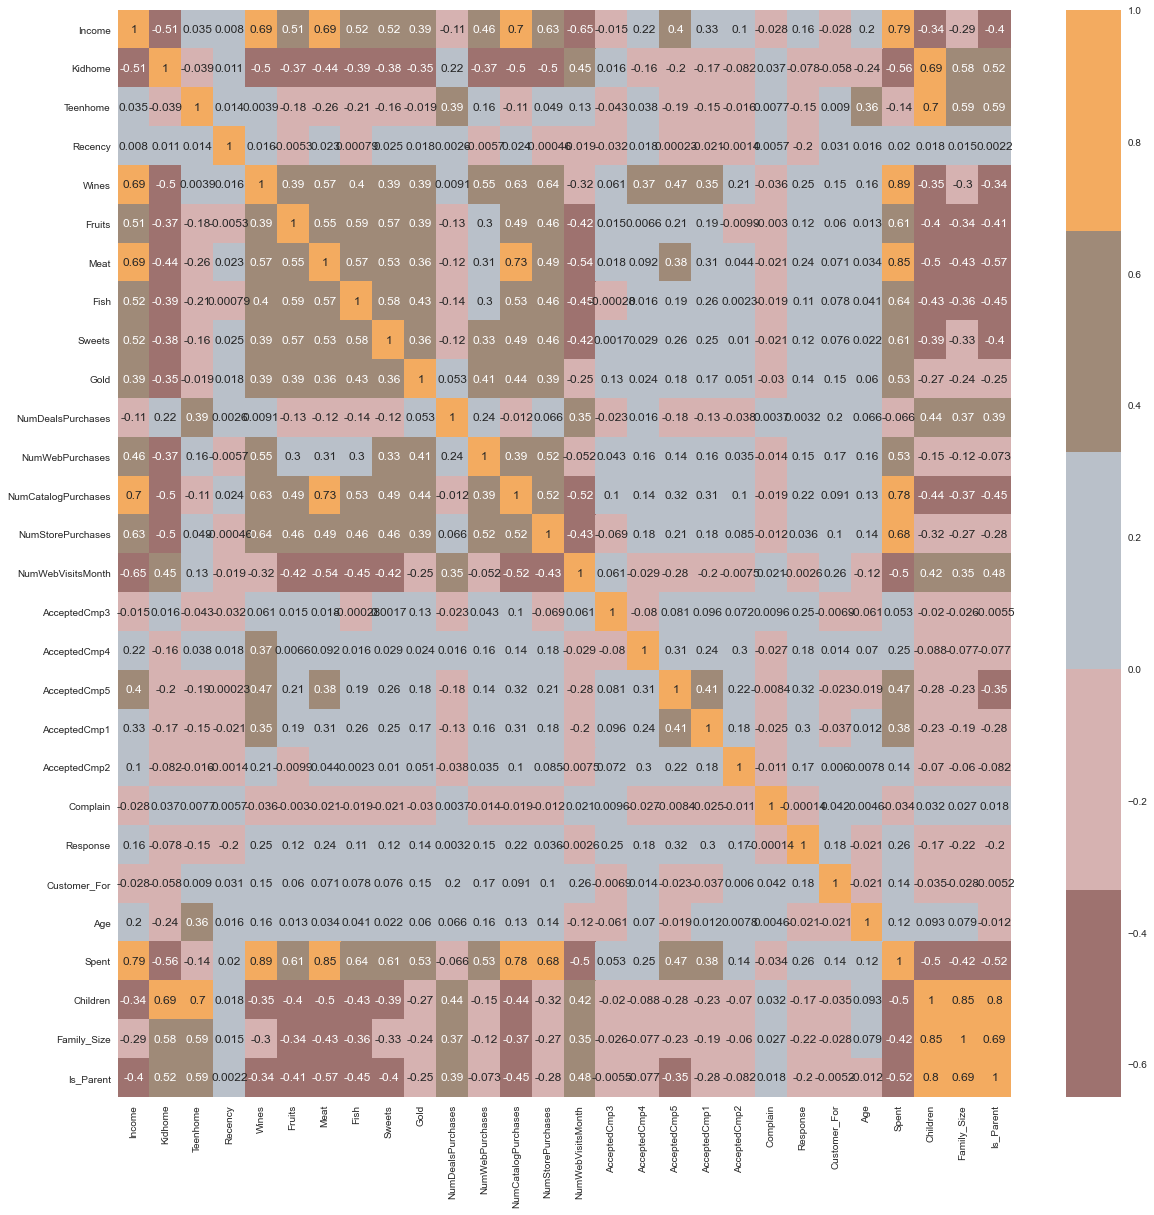

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,center=0,cmap = cmap)
plt.show()

In [33]:
#data preprocessing
#encoding
encoder = LabelEncoder()
mapping = []

for i in cat_cols:
    data[i] = encoder.fit_transform(data[i])
    mapping_dict = {index : label for index , label in enumerate(encoder.classes_)}
    mapping.append(mapping_dict)
    
mapping

[{0: 'Graduate', 1: 'Postgraduate', 2: 'Undergraduate'},
 {0: 'Alone', 1: 'Partner'}]

In [34]:
#dropping the features on deals accepted and promotions
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [35]:
#feature reduction using PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds),columns=(['col1','col2','col3']))
pca_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.405346e-18  2.878377 -5.969395 -2.538494 -0.780421  2.383290   
col2  2212.0  7.478446e-17  1.706839 -4.312164 -1.328329 -0.158132  1.242287   
col3  2212.0  5.377956e-17  1.221956 -3.529619 -0.828083 -0.021974  0.799692   

           max  
col1  7.444305  
col2  6.142708  
col3  6.613923

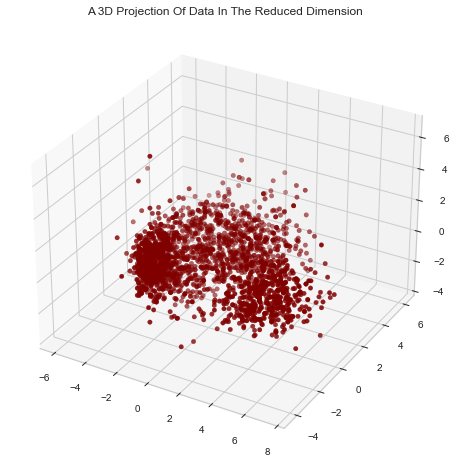

In [36]:
#A 3D Projection Of Data In The Reduced Dimension
x =pca_ds["col1"]
y =pca_ds["col2"]
z =pca_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Deciding # of Clusters

In [37]:
# Implement Elbow method and dendrogram 
#Elbow Method
inertia = []
for i in tqdm(range(2,20)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_ds)
    inertia.append(kmeans.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:05<00:00,  3.58it/s]


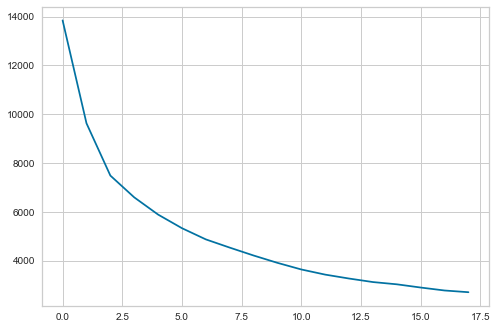

In [38]:
plt.plot(range(len(inertia)),inertia)
plt.show()

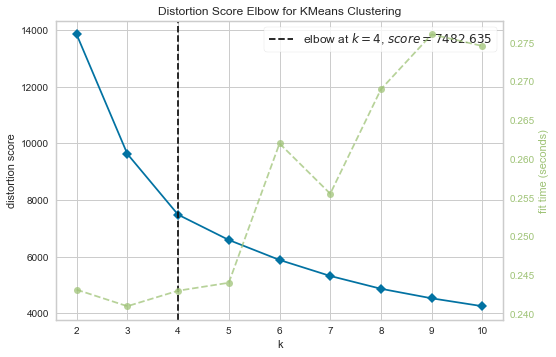

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_ds)
Elbow_M.show()

In [40]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import plotly.figure_factory as ff
figure = ff.create_dendrogram(pca_ds.iloc[1::100,:].values)
figure.update_layout(width=200,height=200)
figure.show()

# Model building

In [41]:
#Kmeans clustering
kmeans = KMeans(n_clusters=4)
k_cluster = kmeans.fit_predict(pca_ds)
pca_ds['K_Clusters'] = k_cluster
data['K_Clusters'] = k_cluster

In [42]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Complain  Response       Customer_For  Age  Spent  \
0      88  ...         0         1  83894400000000000   64   1617   
1       1  ...         0         0  10800000000000000   67     27   
2      21  ...         0         0  40780800000000000   56    776   
3       3  ...         0         0   5616000000000000   37     53   
4      27  ...         0         0  27734400000000000   40    422   

   Living_With  Children  Family_Size  Is_Parent  K_Clusters  
0            0         0            1          0           1  
1            0         2            3          1           0  
2            1         0            2          0           1  
3            1         1            3          1           2  
4            1         1            3          1           0  

[5 rows x 31 columns]

In [43]:
#Agglomerative clustering
ac = AgglomerativeClustering(n_clusters=4)
ac_cluster = ac.fit_predict(pca_ds)
pca_ds['A_Clusters'] = ac_cluster
data['A_Clusters'] = ac_cluster

In [44]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  Response       Customer_For  Age  Spent  Living_With  \
0      88  ...         1  83894400000000000   64   1617            0   
1       1  ...         0  10800000000000000   67     27            0   
2      21  ...         0  40780800000000000   56    776            1   
3       3  ...         0   5616000000000000   37     53            1   
4      27  ...         0  27734400000000000   40    422            1   

   Children  Family_Size  Is_Parent  K_Clusters  A_Clusters  
0         0            1          0           1           2  
1         2            3          1           0           3  
2         0            2          0           1           2  
3         1            3          1           2           0  
4         1            3          1           0           3  

[5 rows x 32 columns]

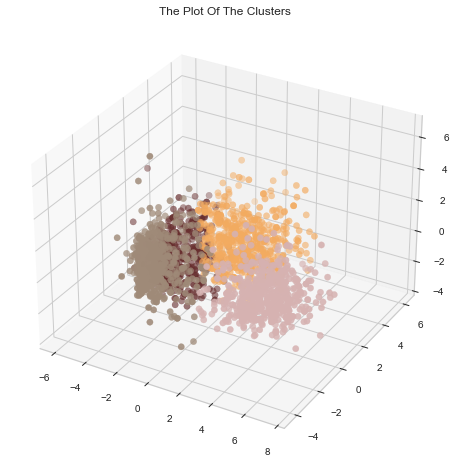

In [45]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_ds["K_Clusters"], marker='o',cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

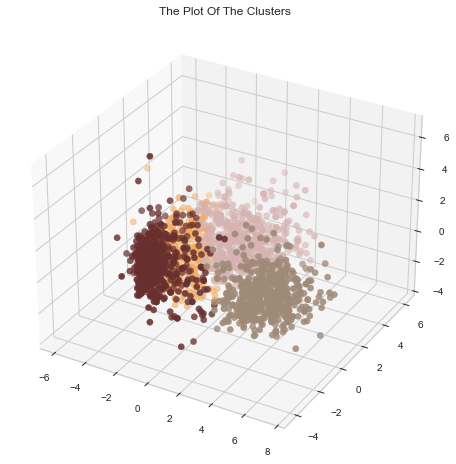

In [46]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_ds["A_Clusters"], marker='o',cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

### EDA using clusters

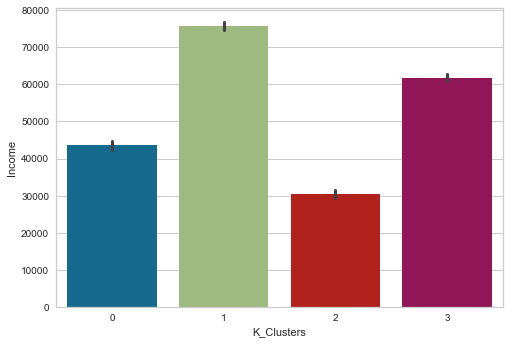

In [53]:
sns.barplot(y = 'Income', x = 'K_Clusters',data = data)
plt.show()

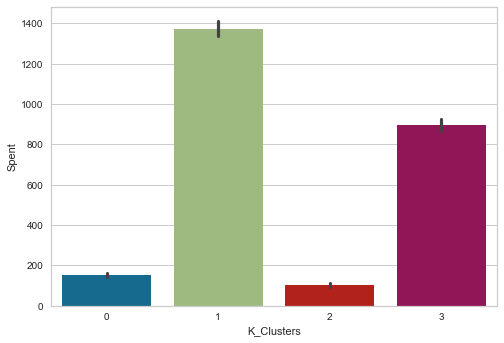

In [54]:
sns.barplot(y = 'Spent', x = 'K_Clusters',data = data)
plt.show()

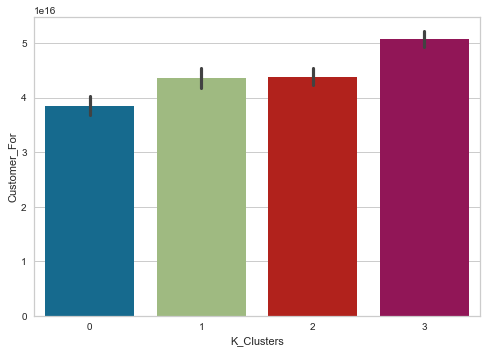

In [55]:
sns.barplot(y = 'Customer_For', x = 'K_Clusters',data = data)
plt.show()

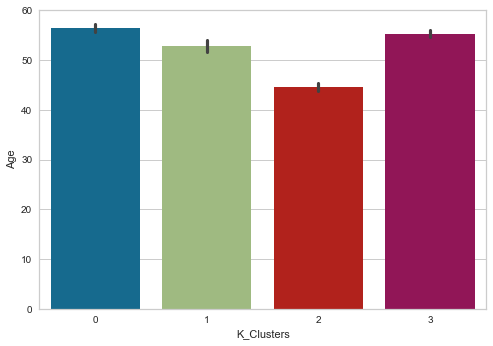

In [56]:
sns.barplot(y = 'Age', x = 'K_Clusters',data = data)
plt.show()

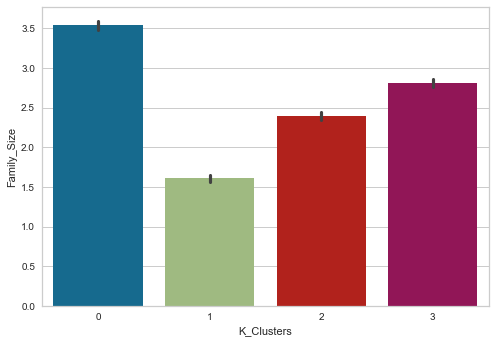

In [57]:
sns.barplot(y = 'Family_Size', x = 'K_Clusters',data = data)
plt.show()

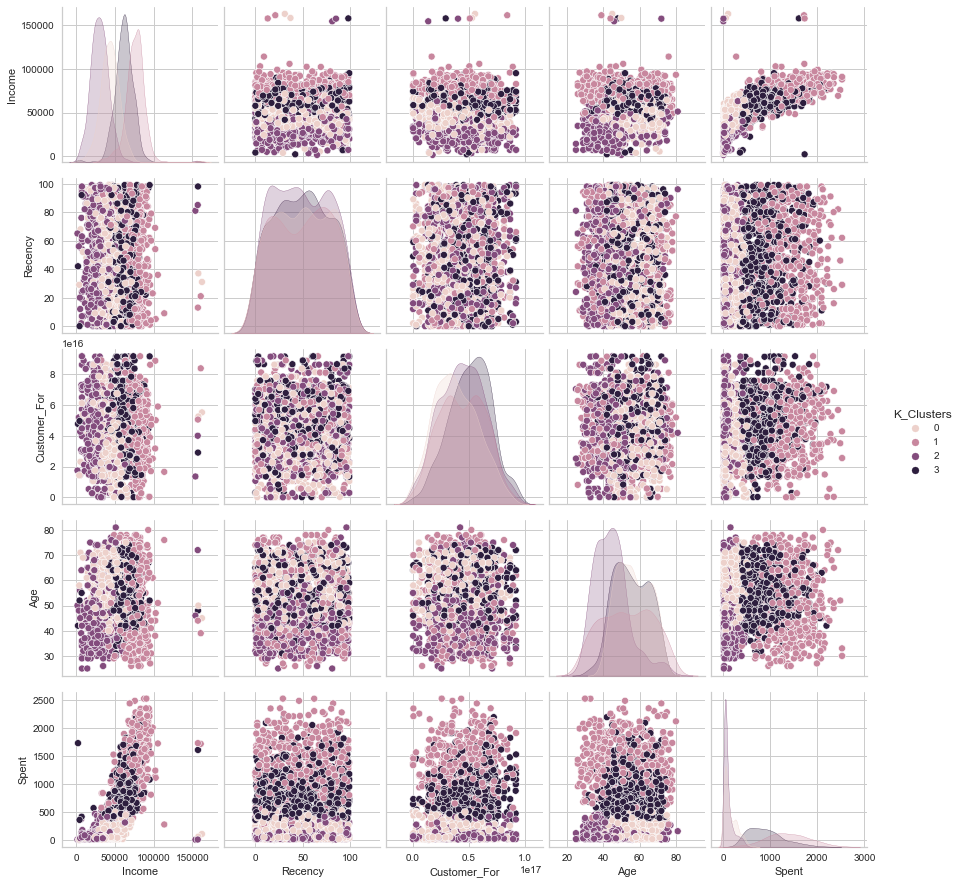

In [71]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "K_Clusters"]
sns.pairplot(data[To_Plot], hue= "K_Clusters")
plt.show()

### characteristics of the formed clusters:
* Cluster 1 customers account for around 50% of the amount spent (main group of customers).
* Cluster 1 customers also have the highest income among other customer groups.
* It is also seen that cluster 1 customer have lowest family size among other groups.
* It does not matter that how long they have been customer because it doesn't not affect how much they spend.
* Age also does not matter.